In [ ]:
# load environment variable from .env file
from dotenv import load_dotenv
load_dotenv()

# **Google AI Studio (GEMINI)**
https://aistudio.google.com/

## Text Generation

In [3]:
from google import genai
from google.genai import types

In [4]:
client = genai.Client()
def googleGeneration(user_input: str):
    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[types.Part.from_text(text=user_input)]),
    ]
    for chunk in client.models.generate_content_stream(model=model,contents=contents):
        print(chunk.text, end="")

In [7]:
googleGeneration("Introduce yourself.")

Hello! I am a large language model, trained by Google. I am designed to provide information and engage in conversation. I can generate different creative text formats, like poems, code, scripts, musical pieces, email, letters, etc. I will try my best to fulfill all your requirements.

How can I help you today?


In [11]:
googleGeneration("What is the date today?")

Today is Thursday, October 26, 2023.


## Uses the Google Search tool to fetch real-time information during generation. 

In [ ]:
def googleGenerationTool(user_input : str):
    client = genai.Client()
    model = "gemini-2.0-flash"
    contents = [
        types.Content(
            role="user",
            parts=[
                types.Part.from_text(text=user_input),
            ],
        ),
    ]
    tools = [
        types.Tool(googleSearch=types.GoogleSearch(
        )),
    ]
    generate_content_config = types.GenerateContentConfig(
        tools=tools,
    )

    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=generate_content_config,
    ):
        print(chunk.text, end="")


In [13]:
googleGenerationTool("What is the date today?")

Today is Tuesday, August 5, 2025.


## Text to Image Generation

In [15]:
import mimetypes  # Used to detect file extension from MIME type
from IPython.display import Image, display  # Used to display images inside Jupyter Notebook

def save_and_display_image(file_name: str, data: bytes):
    with open(file_name, "wb") as f:  # Open file in binary write mode
        f.write(data)  # Write the image data
    print(f"Image saved to: {file_name}")  # Confirm the image has been saved
    display(Image(filename=file_name))  # Display the saved image inline

def imageGeneration(user_input: str):
    """
    Generate an image from a text prompt using Gemini model and display it.
    """
    client = genai.Client()  # Initialize the Gemini client

    # Define the Gemini image-generation model
    model = "gemini-2.0-flash-preview-image-generation"

    # Prepare user input as the message content for the model
    contents = [
        types.Content(
            role="user",  # Set the role as 'user'
            parts=[types.Part.from_text(text=user_input)],  # Add the user's prompt
        ),
    ]

    # Configure the generation settings to include both image and text responses
    config = types.GenerateContentConfig(
        response_modalities=["IMAGE", "TEXT"]  # Request both image and text outputs
    )

    file_index = 0  # Initialize a counter for image filenames

    # Stream the content generated by the model
    for chunk in client.models.generate_content_stream(
        model=model,
        contents=contents,
        config=config,
    ):
        # Check if the response chunk has valid content and parts
        if (
            chunk.candidates
            and chunk.candidates[0].content
            and chunk.candidates[0].content.parts
        ):
            part = chunk.candidates[0].content.parts[0]  # Get the first part of the content

            # If this part contains image data
            if part.inline_data and part.inline_data.data:
                data = part.inline_data.data  # Get the binary image data
                mime = part.inline_data.mime_type  # Get the MIME type of the image
                ext = mimetypes.guess_extension(mime) or ".png"  # Guess file extension
                file_name = f"generated_image_{file_index}{ext}"  # Create unique file name
                file_index += 1  # Increment file index
                save_and_display_image(file_name, data)  # Save and show the image

            # If the part contains a text response instead of an image
            elif hasattr(chunk, "text") and chunk.text:
                print(chunk.text)  # Print the text content

I
 will generate an image of a quaint small town nestled amidst towering, majestic mountains.
 Several enormous waterfalls will cascade down the rocky slopes, creating a stunning visual spectacle. The scene will be bathed in the warm, golden light of a pleasant sunny day, with clear blue skies above.


Image saved to: generated_image_0.png


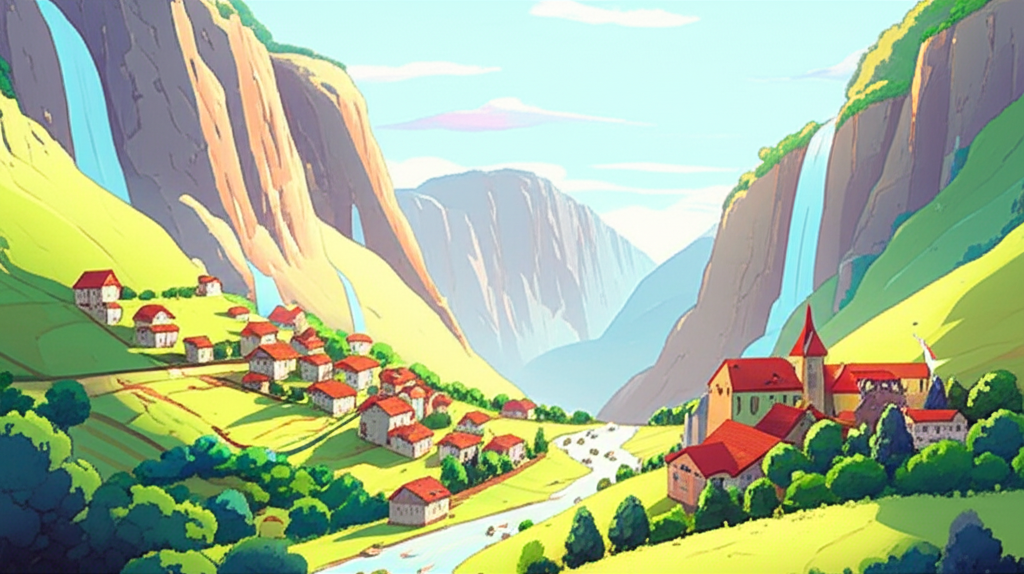

In [16]:
imageGeneration("A small town in the middle of heavenly mountains with massive waterfalls with pleasant sunny weather.")